## Plots of BERT emotions

In [1]:
import pandas as pd
import os
import re
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes
import datetime as dt
import ndjson

In [2]:
def set_base_plot_settings(fontsize, if_palette):
    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=False, ticks=False, fontsize=fontsize)
    a4_dims = (25,15)
    
    if if_palette:
        #          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
        palette = ["#56B4E9", "#000000", "#E69F00",  "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
    else:
        palette = 0
    
    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    sns.set(font_scale = 2)

    return fig, ax1, palette

def set_late_plot_settings(if_dates):
    ax1.set(xlabel="", ylabel = "")
    ax1.xaxis.get_label().set_fontsize(40)
    ax1.yaxis.get_label().set_fontsize(40)

    ax1.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both")
    if if_dates:
        # Define the date format
        ax1.xaxis_date()
        date_form = mdates.DateFormatter("%b-%Y")
        ax1.xaxis.set_major_formatter(date_form)
    plt.rcParams['font.family'] = 'DejaVu Serif'
    return fig, ax1 

def get_emotion_distribution(emo: str, n: int=8):
    '''
    For transforming the BERT emotion distribution from a str to a list of floats
    If there is no emotion distribution, it returns NaN
    '''
    if not isinstance(emo, str): # if emo == NaN
        return emo
    emo_list = re.split(r',\s+', emo[1:-1])[:n]
    emo_list = list(map(lambda x: float(x), emo_list))
    return emo_list

In [3]:
filename = os.path.join("..", "idmdl", "tweets_emo_date_W3.csv")
df = pd.read_csv(filename)

In [4]:
df["date"] = pd.to_datetime(df["date"])
df.head()

,date,emo_prob,novelty,transience,resonance,nsigma,tsigma,rsigma
0,2019-01-01,"[0.14579328851783585, 0.12960305757345764, 0.3...",0.000000,0.006014,0.000000,0.000000,0.000354,0.000000
1,2019-01-02,"[0.08907176251645407, 0.10464972084789613, 0.3...",0.000000,0.001875,0.000000,0.000000,0.001106,0.000000
2,2019-01-03,"[0.08783947459684412, 0.1068106467834229, 0.30...",0.000000,0.001088,0.000000,0.000000,0.000504,0.000000
3,2019-01-04,"[0.08889385312331158, 0.11508794314450768, 0.2...",0.002576,0.000583,0.001993,0.002188,0.000121,0.001154
4,2019-01-05,"[0.09640353072625699, 0.12730145251396646, 0.2...",0.001868,0.001376,0.000492,0.001108,0.000879,0.000994


In [5]:
labels = [
        "Glæde/Sindsro",
        "Tillid/Accept",
        "Forventning/Interrese",
        "Overasket/Målløs",
        "Vrede/Irritation",
        "Foragt/Modvilje",
        "Sorg/trist",
        "Frygt/Bekymret",
    ]

# labels = ["positive", "neutral", "negative"]

In [6]:
emo_lists = list(map(get_emotion_distribution,list(df["emo_prob"])))
for i, label in enumerate(labels):
    df[label] = [distribution[i] for distribution in emo_lists]

In [7]:
event_dict = {"first lockdown": dt.datetime(2020, 3, 11),
              "Queens speech": dt.datetime(2020, 3, 17),
              "phase 1 reopning": dt.date(2020, 4, 14),
              "mask in public transport": dt.datetime(2020, 8, 22),
              "meet-up limit 50-10": dt.datetime(2020, 10, 23),
              "mink": dt.datetime(2020,11,4),
              "second lockdown": dt.datetime(2020, 12, 16),
              # "christmas": dt.datetime(2020, 12, 24),
              # "new year": dt.datetime(2020, 12, 31),
              "first vaccine": dt.datetime(2020,12,27),
              "Pfizer approved": dt.datetime(2021, 1, 6),
              "lockdown extended": dt.datetime(2021, 1, 28),
              "AZ paused": dt.datetime(2021, 3, 11),
              "AZ withdrawn": dt.datetime(2021, 4, 4),
              "coronapas launced": dt.datetime(2021, 5, 27),
            #   "C. Eriksen": dt.datetime(2021,6,12),
              "announced restrictions-lifting": dt.datetime(2021, 8, 27),
              "all restrictions lifted": dt.datetime(2021, 9, 10),
              "somalian funeral": dt.datetime(2020, 7, 31)}

event_dict = {"christmas 2020": dt.datetime(2020, 12, 24),
              "new year 2020": dt.datetime(2020, 12, 31),
              "christmas 2019": dt.datetime(2019, 12, 24),
              "new year 2019": dt.datetime(2019, 12, 31)}

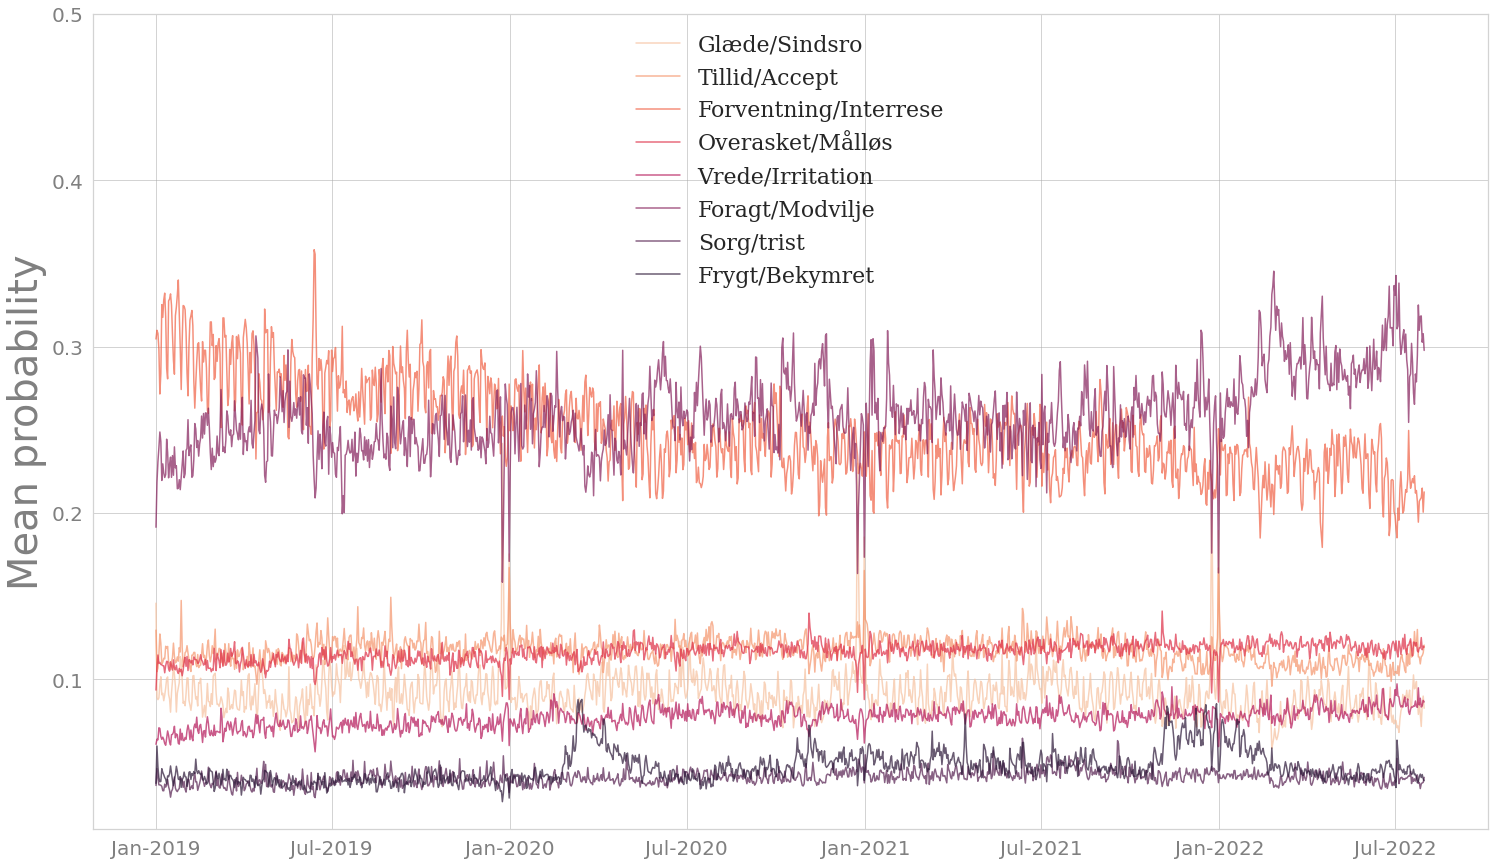

In [8]:
event_dict = None

fig, ax1, palette= set_base_plot_settings(20, True)
plt.rcParams['font.family'] = 'DejaVu Serif'
# palette = ["forestgreen", "goldenrod", "maroon"]
palette = sns.color_palette("rocket_r", as_cmap=False,  n_colors=8)

for i, emotion in enumerate(labels):
    plt.plot(df["date"], df[emotion], color = palette[i], label = labels[i], alpha=0.7)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5), facecolor="white")

fig, ax1 = set_late_plot_settings(if_dates = True)
# ax1.grid(alpha=0.8)
plt.ylabel("Mean probability")
plt.axis(ymax=0.5)
frame = plt.legend(frameon=False).get_frame()
frame.set_facecolor("white")
# plt.savefig("fig/all_pol_events.png")
plt.rcParams["legend.loc"] = "upper right"
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.show()

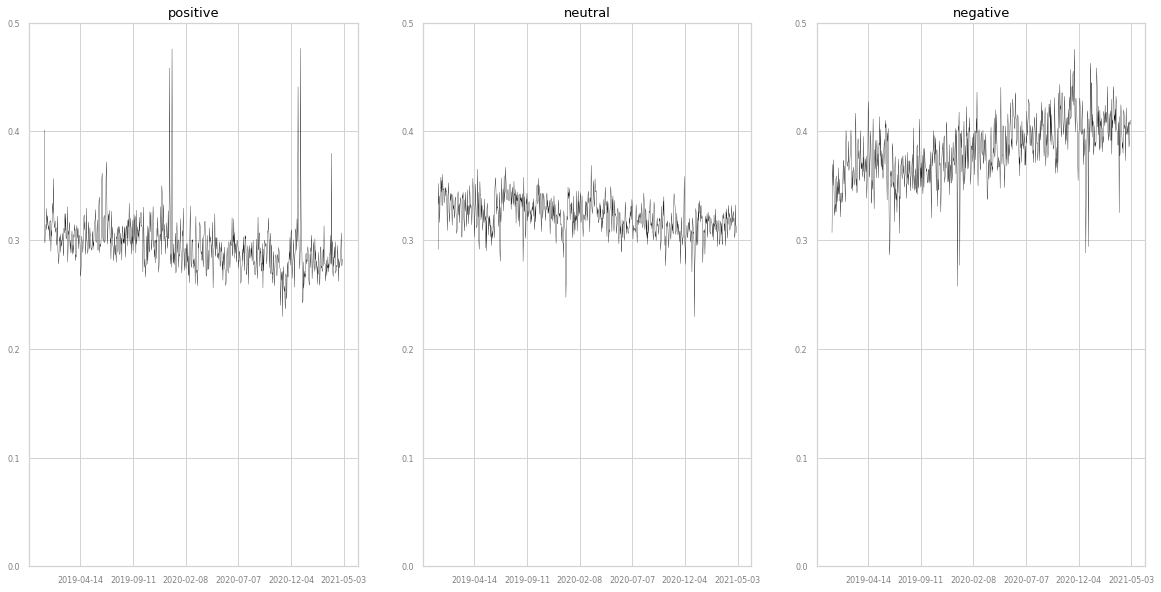

In [56]:
# FOR POLARITY
fig, axs = plt.subplots(1,3, figsize = (20,10))
labelsize = 8
matplotlib.rc('xtick', labelsize=labelsize) 
matplotlib.rc('ytick', labelsize=labelsize) 

themes.theme_minimal(grid=True, ticks=False, fontsize=10)
k = 0
j = 0
for i, emotion in enumerate(labels):
    # ax1 = fig.add_subplot()
    axs[j].plot(df["date"], df[emotion], label = labels[i], linewidth = 0.3)
    axs[j].xaxis.set_major_locator(plt.MaxNLocator(7))
    axs[j].set_title(labels[i], fontdict = {"fontsize": 13}, color = "Black")
    axs[j].axis(ymin=0.0, ymax=0.5)
    j += 1
